# Importing the libraries

In [1]:
#Imporing the important libraries such as pandas, numpy
import pandas as pd
import numpy as np
#Importing seaborn for ploting
import seaborn as sns
#Importing matplotlib for ploting
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import re

#Importing train_test_split to split the data to train and test
from sklearn.model_selection import train_test_split

#Importing countVectorizer to do vectorization
from sklearn.feature_extraction.text import CountVectorizer

#Importing model comparision metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# from scikitplot.metrics import plot_roc, plot_precision_recall

from sklearn.metrics import average_precision_score
#Importing LogisticRegression model
from sklearn.linear_model import LogisticRegression

#Importing the LinearSVC model
from sklearn.svm import LinearSVC
#Importing CalibratedClassifierCV
from sklearn.calibration import CalibratedClassifierCV

#Importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
#Importing RandomForestClassifier to build rf model
from sklearn.ensemble import RandomForestClassifier
#Importing AdaBoostClassifier model
from sklearn.ensemble import AdaBoostClassifier
#Improting Tokenizer to use it in the tokenization process
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Importing tensorflow
import tensorflow as tf

#Importing wordCloud
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (18,6)
pd.set_option('display.max_columns', 50)

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
import pandas as pd

# Load the dataset from the URL or file
path = "https://github.com/hibahdesu/News-Sentiment-Analysis/raw/main/data/news.csv"
df = pd.read_csv(path)

# Convert 'date' column to datetime format for easier manipulation
df['date'] = pd.to_datetime(df['date'])

# Check the dataset structure
df.head()

,date,news,neg,neu,pos,compound,sentiment
0,2007-07-07,It was a long antipodean night. While there’s ...,0.059000,0.87800,0.064000,0.051600,POSITIVE
1,2007-07-07,In Mexico there are no licensing or registrati...,0.044000,0.95600,0.000000,-0.296000,NEGATIVE
2,2007-07-07,The government has until Monday to protect the...,0.000000,0.89400,0.106000,0.381800,POSITIVE
3,2007-07-07,A record-breaking heat wave in the Southwest i...,0.197505,0.66149,0.141005,0.997491,POSITIVE
4,2007-07-07,England started its Live Earth concert at Wemb...,0.033000,0.94500,0.022000,-0.177900,NEGATIVE


In [4]:
# Let's see the shape of the dataset we have
print(f'The shape of the dataset is: {df.shape}')

The shape of the dataset is: (427482, 7)


In [5]:
# Let's see the columns in our dataset
print(f'The columns in our dataset are: {df.columns}')

The columns in our dataset are: Index(['date', 'news', 'neg', 'neu', 'pos', 'compound', 'sentiment'], dtype='object')


In [6]:
# Let's see the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427482 entries, 0 to 427481
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       427482 non-null  datetime64[ns]
 1   news       427482 non-null  object        
 2   neg        427482 non-null  float64       
 3   neu        427482 non-null  float64       
 4   pos        427482 non-null  float64       
 5   compound   427482 non-null  float64       
 6   sentiment  427482 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 22.8+ MB


In [7]:
# Let's see if we have null data
df.isna().sum()
# As we can see, we have 0 null data in all the columns

,0
date,0
news,0
neg,0
neu,0
pos,0
compound,0
sentiment,0


In [8]:
# Let's see if we have duplicated data
df.duplicated().sum()

0

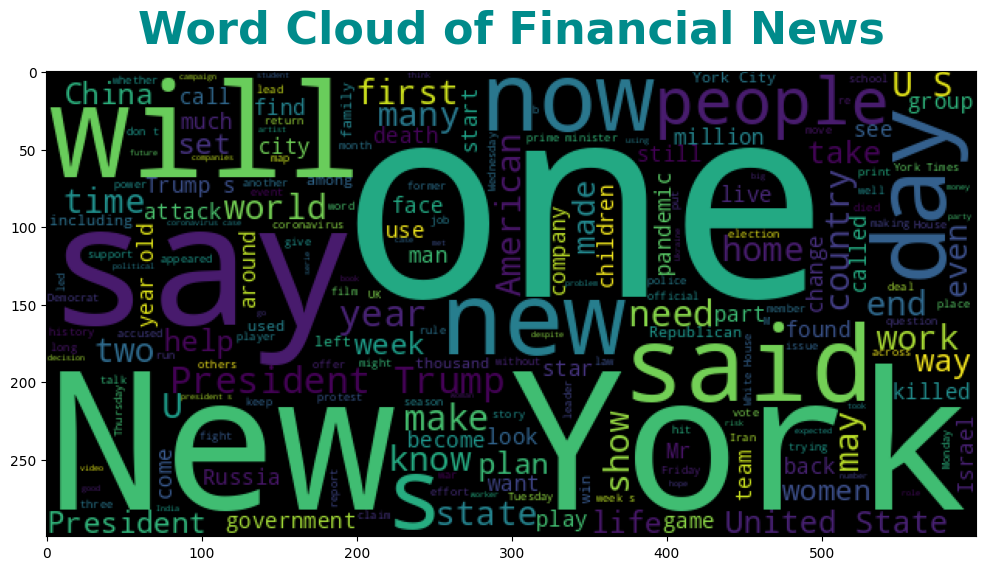

In [10]:
# Convert the 'news' column to string type
df['news'] = df['news'].astype(str)

# Now generate the word cloud
plt.figure(figsize=(12, 8))
wc = WordCloud(width=600, height=300, random_state=101).generate(' '.join(df.news))
plt.title('Word Cloud of Financial News', fontsize=32, fontweight='bold', color='darkcyan', pad=20)
plt.imshow(wc);

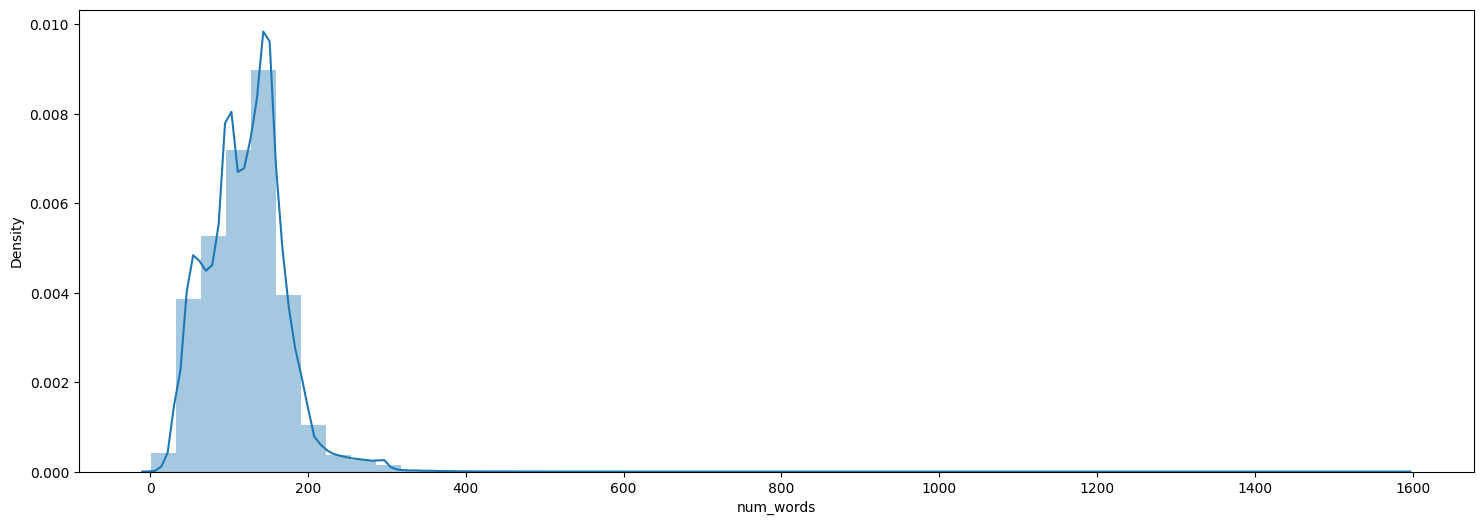

In [11]:
df['num_words'] = df.news.apply(len)
sns.distplot(df['num_words']);

In [12]:
df.num_words.describe()

,num_words
count,427482.000000
mean,122.149768
std,49.043869
min,1.000000
25%,89.000000
50%,123.000000
75%,151.000000
max,1586.000000


In [13]:
# Describe the sentiment columns to get statistical summaries
print(df[['neg', 'neu', 'pos', 'compound']].describe())


                 neg            neu            pos       compound
count  427482.000000  427482.000000  427482.000000  427482.000000
mean        0.140294       0.742719       0.116985       0.243870
std         0.166470       0.162196       0.135587       0.623274
min         0.000000       0.000000       0.000000      -0.990800
25%         0.000000       0.672000       0.004264      -0.340000
50%         0.095000       0.782000       0.087000       0.361200
75%         0.207872       0.861000       0.167336       0.877805
max         1.000000       0.980000       1.000000       0.999887


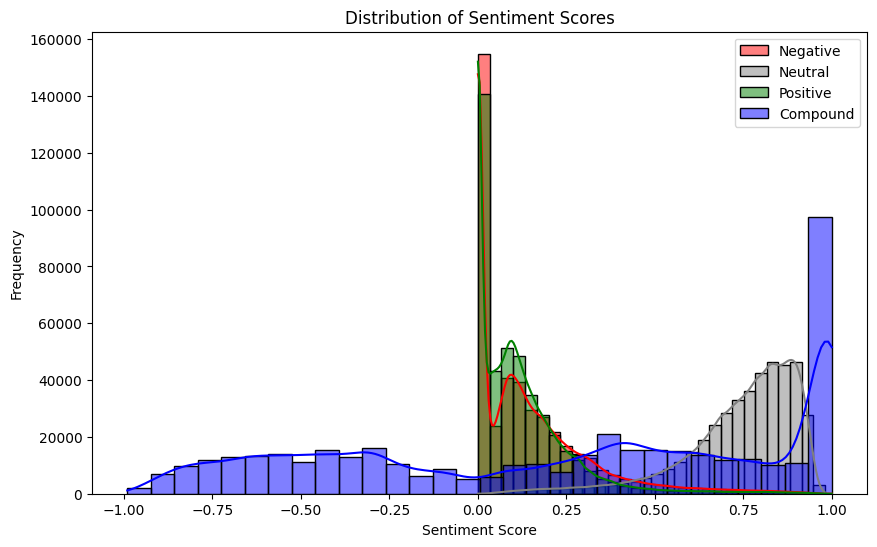

In [14]:
# Distribution of sentiment scores (neg, neu, pos, compound)
plt.figure(figsize=(10, 6))
sns.histplot(df['neg'], kde=True, color='red', label='Negative', bins=30)
sns.histplot(df['neu'], kde=True, color='gray', label='Neutral', bins=30)
sns.histplot(df['pos'], kde=True, color='green', label='Positive', bins=30)
sns.histplot(df['compound'], kde=True, color='blue', label='Compound', bins=30)

plt.legend()
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


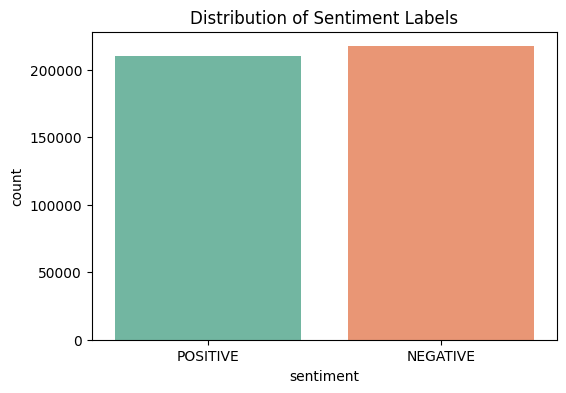

In [15]:
# Count plot for the 'sentiment' column
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiment Labels')
plt.show()


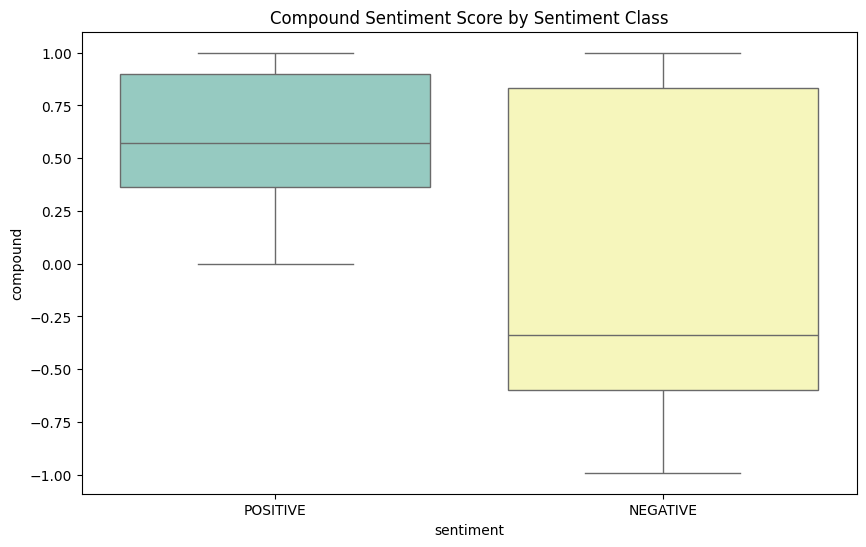

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='compound', data=df, palette='Set3')
plt.title('Compound Sentiment Score by Sentiment Class')
plt.show()


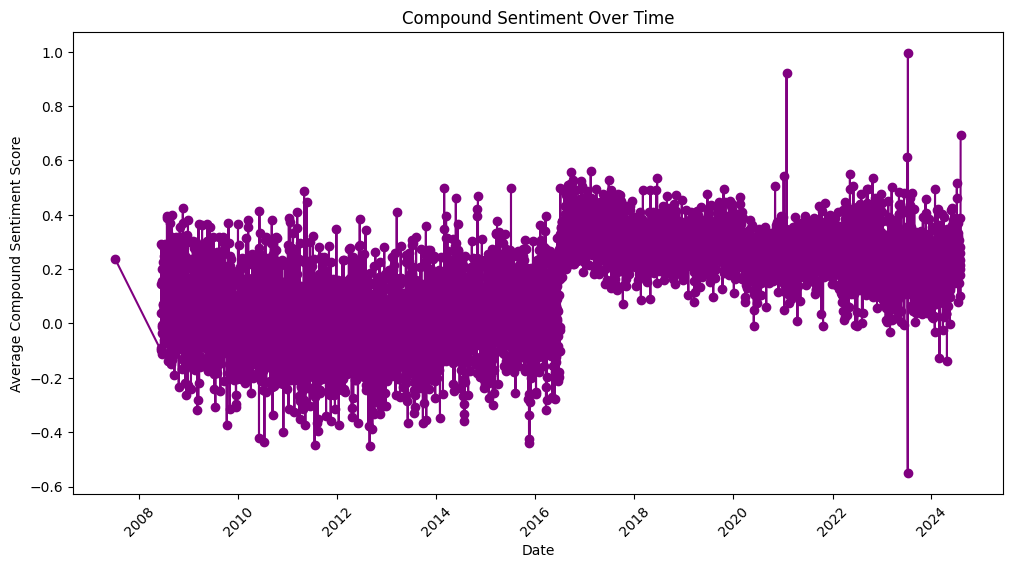

In [17]:
# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Group by date and compute the mean compound sentiment
df_time_series = df.groupby(df['date'].dt.date)['compound'].mean().reset_index()

# Plot sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['date'], df_time_series['compound'], marker='o', color='purple')
plt.title('Compound Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Compound Sentiment Score')
plt.xticks(rotation=45)
plt.show()


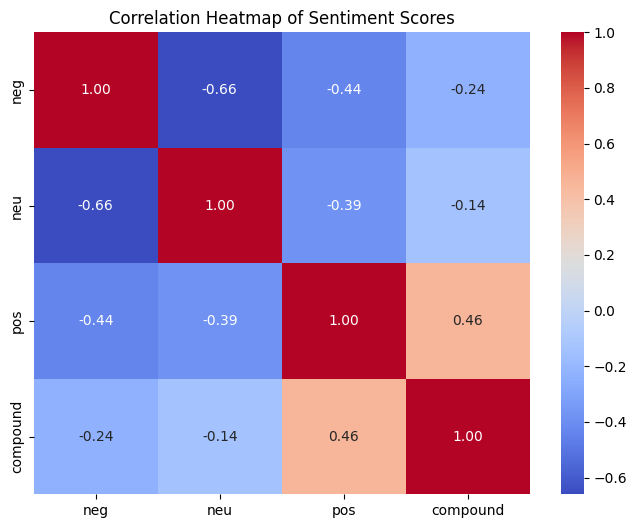

In [19]:
# Calculate correlation matrix
correlation_matrix = df[['neg', 'neu', 'pos', 'compound']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Sentiment Scores')
plt.show()
